# Linear regression with one variable

In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import data
data = pd.read_csv('dataset/ex1data1.txt', header = None, names = ['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Let's plot it to get a better idea of what the data looks like.

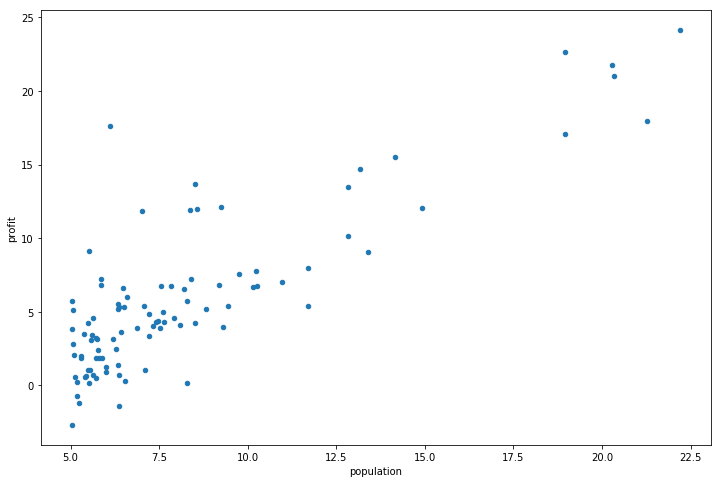

In [5]:
data.plot(kind = 'scatter',x = 'population', y= 'profit', figsize=(12,8))
plt.show()

In [6]:
# insert a column of 1 in data to make matrix multiplication easier
# remember x0*theta0 here x0 is 1 for whole column
data.insert(0,'ones',1)

In [7]:
#initializing important values
alpha = 0.01
#initializing theta(parameters) to zero
theta = np.zeros([2,1])
iterations = 1500
theta.shape, theta.ndim

((2, 1), 2)

In [8]:
col = data.shape[1]
X = data.iloc[:,0:col-1]
Y = data.iloc[:,col-1:col]
m = Y.size
#lets check shape of data and theta before matrix multiplication
X.shape, theta.shape, Y.shape

((97, 2), (2, 1), (97, 1))

In [9]:
#code to compute cost function which is difference between predicted value and actual value
def cost(X,Y,theta):
    error = np.dot(X,theta) - Y
    return np.sum(np.power(error, 2)) / (2*m)
    
cost(X,Y,theta)

profit    32.072734
dtype: float64

# Finding the optimal parameters using Gradient Descent

In [10]:
def gradientDescent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        error = np.dot(X,theta) - Y
        temp =  np.dot(X.T,error)
        theta = theta - (alpha/m) * temp
    return theta
        
theta = gradientDescent(X, Y, theta, alpha, iterations)
theta


array([[-3.63029144],
       [ 1.16636235]])

We now have the optimized value of theta . Use this value in the above cost function.

In [11]:
J = cost(X,Y,theta)
J

profit    4.483388
dtype: float64

It should give you a value of 4.483 which is much better than 32.07

# Plot showing the best fit line

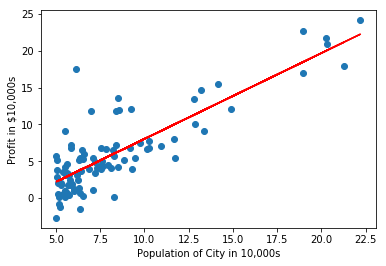

In [18]:
plt.scatter(x = X.iloc[:,1],y = Y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X.iloc[:,1], np.dot(X, theta), c = 'red')
plt.show()